# Creating a Knowledge Graph from the Hotel Reviews Dataset

## Installation of Libraries

In [ ]:
!pip install pyvis IPython cchardet datasets langchain==0.1.17 neo4j openai tiktoken langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 476.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.6/867.6 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.6/293.6 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.3/361.3 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━

## Data Setup

In [ ]:
from getpass import getpass
import os

if os.getenv("OPENAI_API_KEY") is None:
  if any(['VSCODE' in x for x in os.environ.keys()]):
    print('Please enter password in the VS Code prompt at the top of your VS Code window!')
  os.environ["OPENAI_API_KEY"] = getpass("")

assert os.getenv("OPENAI_API_KEY", "").startswith("sk-"), "This doesn't look like a valid OpenAI API key"
print("OpenAI API key configured")

··········
OpenAI API key configured


In [ ]:
from datasets import load_dataset
import pandas as pd

dataset = load_dataset("traversaal-ai-hackathon/hotel_datasets")

df=pd.DataFrame(dataset['train'])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/5997 [00:00<?, ? examples/s]

In [ ]:
df.head(8)

,hotel_name,hotel_description,review_title,review_text,rate,tripdate,hotel_url,hotel_image,price_range,rating_value,review_count,street_address,locality,country
0,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"An exceptional boutique hotel, great value for...",None,NaN,February 2020,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye
1,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,You can’t get better than this.,None,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye
2,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Exceeds all expectations,None,NaN,March 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye
3,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,"Great Location, Fantastic Accommodations",None,NaN,August 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye
4,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Perfection. It is all in the details.,None,NaN,June 2021,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye
5,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Exquisite lovely hotel in every aspect,None,NaN,February 2020,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye
6,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,Vacation in istanbul,None,NaN,January 2020,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye
7,Romance Istanbul Hotel,Romance Istanbul Hotel has 39 rooms.Every room...,The perfect reviews are 100% warranted - belie...,None,NaN,January 2020,https://www.tripadvisor.com/Hotel_Review-g2939...,https://media-cdn.tripadvisor.com/media/photo-...,$ (Based on Average Nightly Rates for a Standa...,5.0,4023,Hudavendigar Cd. No:5 Sirkeci,Istanbul,Turkiye


## Strategy: Populating a KG programmatically from each record

Design considerations for this knowlede graph are follows:

1. From the original dataset, we identify 4 core entities (HOTEL, REVIEW, LOCALITY, & COUNTRY) and one derived entity (TRIP_PERIOD, corresponding to the time of the original trip - a useful base for potential analysis of temporal patterns in the dataset).
2. Because of unescaped characters in some of the reviews, as well as the need to keep the KG complexity at manageable levels, we do some data pre-processing to clean the text and to condense the `tripdate` column values into seasonal buckets in a `trip_period` column.
3. To keep the final knowledge graph legible to human eyes, we can use stratified sampling against the `hotel_name`, `trip_period`, `locality`, and `rating_value` columns to obtain a representative sample of the full dataset for the KG. A 10% sample size produces a knowledge graph with plenty of complexity; from my experimentation, the force physics of the graph **fail to find equilibrium above 15-18%**, keeping the center of the graph in motion and difficult to read straight. Feel free to adjust this value to your liking.
4. Nodes are colored as follows:
- - Hotel: blue
- - Review: orange
- - Trip period: magenta
- - Locality: red
- - Country: green


In [ ]:
df['review_text'] = df['review_text'].str.replace('$', '\$', regex=True)

df['review_title'] = df['review_title'].str.replace('$', '\$', regex=True)

month_to_season = {
    'January': 'Winter',
    'February': 'Winter',
    'March': 'Spring',
    'April': 'Spring',
    'May': 'Spring',
    'June': 'Summer',
    'July': 'Summer',
    'August': 'Summer',
    'September': 'Fall',
    'October': 'Fall',
    'November': 'Fall',
    'December': 'Winter'
}

# Condense the many distinct date values from "Month Year" to "Season Year"
def convert_to_season_year(month_year_str: str):
    month = month_year_str.split()[0] if ' ' in month_year_str else ''

    if month in month_to_season:
        season = month_to_season[month]
        year = month_year_str.split()[1]
        return f"{season} {year}"

    else:
      return 'Unknown'


df['trip_period'] = df['tripdate'].apply(convert_to_season_year)

In [ ]:
# @title Knowledge Graph Builder & Visualizer
# @markdown Note that rendering the graph will take a minute or two under the default 10% sample size, longer with higher sample sizes.
sample_size = 0.07 # @param {type:"number", default:0.10}
import pandas as pd
import networkx as nx
from pyvis.network import Network
from IPython.display import IFrame
from IPython.display import Markdown, HTML


colors = {
    'HOTEL': 'lightblue',
    'REVIEW': 'orange',
    'LOCALITY': 'red',
    'COUNTRY': 'green',
    'TRIP_DATE': 'magenta'
}
sizes = {
    'HOTEL': 20,
    'REVIEW': 15,
    'LOCALITY': 25,
    'COUNTRY': 30,
    'TRIP_DATE': 10
}

# Stratify based on 'rating_value', 'locality', 'trip_period', 'hotel_name' columns
stratify_cols = ['rating_value', 'locality', 'trip_period', 'hotel_name']
sample_size = 0.10

# Perform stratified sampling
sampled_df = df.groupby(stratify_cols, group_keys=False).apply(lambda x: x.sample(frac=sample_size))

# Initialize a directed graph
G = nx.DiGraph()

# Adding nodes with the entity type as a node attribute
for index, row in sampled_df.iterrows():
    if row['hotel_name'] not in G:
      G.add_node(row['hotel_name'],
                 entity='HOTEL',
                 description=row['hotel_description'],
                 url=row['hotel_url'],
                 image=row['hotel_image'],
                 address=row['street_address'],
                 price_range=row['price_range'],
                 locality=row['locality'],
                 color=colors.get('HOTEL', 'gray'),
                 size=sizes.get('HOTEL', 10), )
    if row['locality'] not in G:
      G.add_node(row['locality'], entity='LOCALITY', color=colors.get('LOCALITY', 'gray'),
                 size=sizes.get('LOCALITY', 10))

    if row['country'] not in G:
      G.add_node(row['country'], entity='COUNTRY', color=colors.get('COUNTRY', 'gray'),
                 size=sizes.get('COUNTRY', 10))

    if row['trip_period'] != None and row['trip_period'] not in G:
        G.add_node(row['trip_period'], entity='TRIP_DATE', color=colors['TRIP_DATE'], size=sizes['TRIP_DATE'])

    if not G.has_edge(row['hotel_name'], row['locality']):
      G.add_edge(row['hotel_name'], row['locality'], relationship='LOCATED_IN', color='red')

    if not G.has_edge(row['locality'], row['country']):
      G.add_edge(row['locality'], row['country'], relationship='LOCATED_IN', color='red')


    G.add_node(
               row['review_title'],
               entity='REVIEW',
               text=row['review_text'],
               tripdate=row['trip_period'],
               rating_value=row['rating_value'],
               color=colors.get('REVIEW', 'gray'),
               size=sizes.get('REVIEW', 10))
    # Adding edges to denote relationships
    G.add_edge(row['hotel_name'], row['review_title'], relationship='HAS_REVIEW')
    if row['trip_period'] != None:
      G.add_edge(row['review_title'], row['trip_period'], relationship='ON_DATE')

# Step 4: Visualization (Optional)
# Convert to a pyvis network
nt = Network('700px', '700px', notebook=True, cdn_resources='in_line')
# if you are not in a Jupyter environment, you might need to set notebook=False
nt.from_nx(G)
nt.toggle_physics(True)  # Enable force-directed algorithm
nt.save_graph('hotel_reviews_graph.html')
nt.show('hotel_reviews_graph.html')

HTML('hotel_reviews_graph.html')


hotel_reviews_graph.html


# Neo4j Database Setup

Now that we have an in-memory knowledge graph, we should persist it to storage in a flat file or graph database. We will take the database route.

Go to https://neo4j.com/cloud/platform/aura-graph-database/ and sign up for a free account. We will use that account to create an instance of the free Aura database service and load our knowledge graph into it. (Provisioning the DB will take a few minutes)
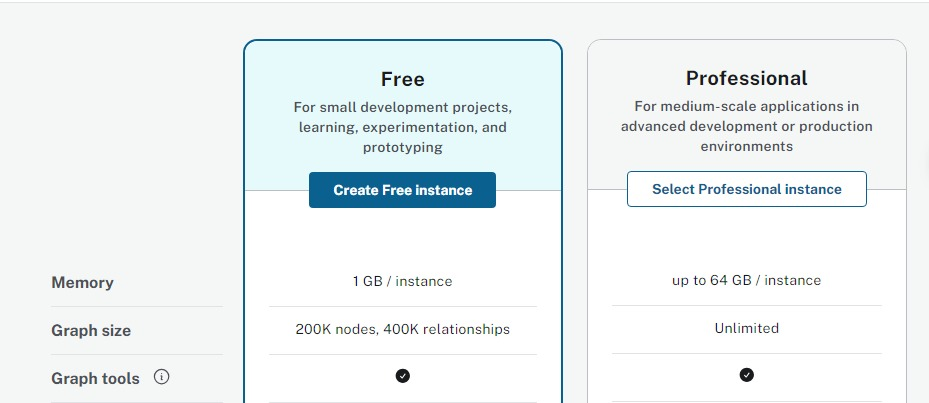

After you select "Create Free Instance" on the above screen, you'll be shown a modal window with your credentials to connect to the new instance. Copy them down to a safe place (or click "Download and continue") and enter them into the cell below.

In [ ]:
from neo4j import GraphDatabase
from google.colab import userdata

url = userdata.get('NEO4J_URI')
username ="neo4j"
password = getpass("Enter Neo4j Aura password:")

driver = GraphDatabase.driver(url, auth=(username, password))

Enter Neo4j Aura password:··········


### Ingest the data into Neo4j

In [ ]:
def add_graph_to_neo4j(driver, graph):
    with driver.session() as session:
        # Add Nodes
        for node, attrs in graph.nodes(data=True):
            cypher_query = """
            MERGE (n:{label} {{name: $name, entity: $entity}})
            SET n += $props
            """.format(label=attrs['entity'])  # Dynamically set the label based on the 'entity' attribute
            session.run(cypher_query, name=node, entity=attrs['entity'], props={k: v for k, v in attrs.items() if k not in ['entity']})

        # Add Edges
        for source, target, attrs in graph.edges(data=True):
            cypher_query = """
            MATCH (a),(b)
            WHERE a.name = $source AND b.name = $target
            MERGE (a)-[r:{relationship}]->(b)
            SET r += $props
            """.format(relationship=attrs['relationship'])  # Dynamically set the relationship type
            session.run(cypher_query, source=source, target=target, props={k: v for k, v in attrs.items() if k not in ['relationship']})

# Finally, call the function to add your graph to Neo4j
add_graph_to_neo4j(driver, G)


In [ ]:
import os
from langchain.vectorstores.neo4j_vector import Neo4jVector
from langchain.embeddings.openai import OpenAIEmbeddings

vector_index = Neo4jVector.from_existing_graph(
    OpenAIEmbeddings(),
    url=url,
    username=username,
    password=password,
    index_name='reviews',
    node_label="REVIEW",
    text_node_properties=['name', 'text'],
    embedding_node_property='embedding',
)


/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 0.3.0. An updated version of the class exists in the langchain-openai package and should be used instead. To use it run `pip install -U langchain-openai` and import as `from langchain_openai import OpenAIEmbeddings`.
  warn_deprecated(


In [ ]:
response = vector_index.similarity_search(
    "What positive things are said about the Sirdeci Mansion Hotel?"
)

In [ ]:
print(response[0].page_content)


name: Wonderful stay in Istanbul\$
text: We spent 3 nights at the Sirkeci Mansion Hotel and cannot say enough about their welcoming hospitality. Our room overlooking the quaint street below and the gardens beyond set the scene for our 3 day visit. Mr. Okay Agah Alkan and the rest of the staff were very helpful in putting us at our ease in this warm, inviting hotel. The breakfasts were wonderful and plentiful, with honey from a fresh honeycomb. The rooftop bar area was perfect for watching the nesting herons while enjoying a beer. The perfect ending before boarding our ship was my hammam experience at the hotel spa. Definitely recommend the foam scrub and massage. Also, the hotel is within an easy walk to the main tourist sites in Sultanahmet.  Don't look any further, this is your hotel in Istanbul. Sandra and Donald,\$


In [ ]:
from langchain.chains import RetrievalQA
from langchain.chat_models import ChatOpenAI

vector_qa = RetrievalQA.from_chain_type(
    llm=ChatOpenAI(),
    chain_type="stuff",
    retriever=vector_index.as_retriever()
)
vector_qa.run(
    "What positive things are said about the Sirdeci Mansion Hotel?"
)

'Positive things said about the Sirkeci Mansion Hotel include:\n\n- Welcoming hospitality from Mr. Okay Agah Alkan and the rest of the staff.\n- Room overlooking a quaint street and gardens.\n- Wonderful and plentiful breakfasts with honey from a fresh honeycomb.\n- Rooftop bar area perfect for watching nesting herons.\n- Hammam experience at the hotel spa recommended, especially the foam scrub and massage.\n- Easy walking distance to main tourist sites in Sultanahmet.'

In [ ]:
from langchain.chains import GraphCypherQAChain
from langchain.graphs import Neo4jGraph

graph = Neo4jGraph(
    url=url,
    username=username,
    password=password
)

graph.refresh_schema()

cypher_chain = GraphCypherQAChain.from_llm(
    cypher_llm = ChatOpenAI(temperature=0, model_name='gpt-4'),
    qa_llm = ChatOpenAI(temperature=0), graph=graph, verbose=True,
)

## Querying the knowledge graph RAG

The graph RAG can run logical operators on the data:

In [ ]:
cypher_chain.run(
    "How many reviews does the Romance Istanbul Hotel have?"
)



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (h:HOTEL {name: "Romance Istanbul Hotel"})-[:HAS_REVIEW]->(r:REVIEW) RETURN COUNT(r)
Full Context:
[{'COUNT(r)': 3}]

> Finished chain.


'Romance Istanbul Hotel has 3 reviews.'

In [ ]:
cypher_chain.run(
    "Which hotel has the most reviews?"
)



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (h:HOTEL)-[:HAS_REVIEW]->(r:REVIEW)
RETURN h.name, COUNT(r) AS review_count
ORDER BY review_count DESC
LIMIT 1
Full Context:
[{'h.name': 'Hotel Astoria - Astotel', 'review_count': 5}]

> Finished chain.


'Hotel Astoria - Astotel has 5 reviews.'

The graph RAG can answer questions that require reasoning over multiple "hops" of relationships:

In [ ]:
cypher_chain.run(
    "What positive things were said in reviews for hotels in San Francisco where the reviewer's trip date occurred in Fall 2023?"
)



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (h:HOTEL)-[:LOCATED_IN]->(l:LOCALITY {name: 'San Francisco'}), (h)-[:HAS_REVIEW]->(r:REVIEW), (r)-[:ON_DATE]->(t:TRIP_DATE {name: 'Fall 2023'}) 
WHERE r.rating_value > 3 
RETURN r.text
Full Context:
[{'r.text': 'The room was spacious and elegantly decorated. The bed was exceptionally comfortable, and the in-room amenities provided everything I needed for a relaxing stay. .This is a perfect place to unwind. ..\\$'}, {'r.text': "Great location and helpful staff. The bed wasn't as comfortable as I'd prefer but ordered a bunch of extra pillows and that helped. It was hard to close the curtains since there is a large counter in front of the cord. Pretty quiet although you could hear your neighbors open and close their curtains as well as the alarm for the parking garage sometimes.\\$"}, {'r.text': 'Lovely hotel, well situated in easy distance to all of the main sights. Everything you need is included and room was very clea

"The room was spacious and elegantly decorated. The bed was exceptionally comfortable, and the in-room amenities provided everything I needed for a relaxing stay. This is a perfect place to unwind. Great location and helpful staff. The bed wasn't as comfortable as I'd prefer but ordered a bunch of extra pillows and that helped. It was hard to close the curtains since there is a large counter in front of the cord. Pretty quiet although you could hear your neighbors open and close their curtains as well as the alarm for the parking garage sometimes. Lovely hotel, well situated in easy distance to all of the main sights. Everything you need is included and room was very clean. Games room and outside area very nice, free coffee a lovely touch. Plenty of places to top up water bottles. Would definitely stay again! I will say the housekeeping is among the best I’ve ever had. The room was spotless and kept dust free over the entire two weeks we were there. Safety wise, it wasn’t too bad compa

By the same token, the graph RAG can answer questions that require understanding of indirect relationships:

In [ ]:
cypher_chain.run(
    "What reviews were left for hotels in Turkiye?"
)



> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (h:HOTEL)-[:LOCATED_IN]->(l:LOCALITY)-[:LOCATED_IN]->(c:COUNTRY {name: 'Turkiye'}), (h)-[:HAS_REVIEW]->(r:REVIEW)
RETURN h.name AS Hotel, r.text AS Review
Full Context:
[{'Hotel': 'YOTEL Istanbul Airport Hotel (Landside)', 'Review': 'The bar and restaurant were excellent.  Service by seref  and osman was first class!  Well done.  Food was good as well.  Will definitely return next visit to Istanbul airport.  Perfect Moscow Mules! \\$'}, {'Hotel': 'YOTEL Istanbul Airport Hotel (Landside)', 'Review': "The Yotel Istanbul (Landside) is a great place to overnight in Istanbul for a tour and flight the following day.  I checked hotels away from the airport and by the time you would pay a taxi or shuttle service to and from the hotel off site, Yotel onsite was the better deal.  The Yotel was extremely clean and very quiet for a good night's sleep.  Also very comfortable beds.\\$"}, {'Hotel': 'Pell Palace Hotel Spa', 'Review':

'The reviews left for hotels in Turkiye were positive and highlighted excellent service, cleanliness, comfort, and helpful staff.'

## Combining vector RAG and graph RAG together in a single query interface

In [ ]:
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType

tools = [
    Tool(
        name="Reviews",
        func=vector_qa.run,
        description="""Useful when you need to answer questions about descriptions of hotel reviews.
        Not useful for counting the number of reviews.
        Use full question as input.
        """,
    ),
    Tool(
        name="Graph",
        func=cypher_chain.run,
        description="""Useful when you need to answer questions about hotels,
        or their location. Also useful for any sort of
        aggregation like counting the number of reviews, etc.
        Use full question as input.
        """,
    ),
]

mrkl = initialize_agent(
    tools,
    ChatOpenAI(temperature=0, model_name='gpt-4'),
    agent=AgentType.OPENAI_FUNCTIONS, verbose=True
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc. instead.
  warn_deprecated(


In [ ]:
response = mrkl.invoke({"input": "Which hotel says it has 39 rooms in its description?"})
print(response)



> Entering new AgentExecutor chain...

Invoking: `Graph` with `Which hotel says it has 39 rooms in its description?`




> Entering new GraphCypherQAChain chain...
Generated Cypher:
MATCH (h:HOTEL) WHERE h.description CONTAINS '39 rooms' RETURN h.name
Full Context:
[{'h.name': 'Romance Istanbul Hotel'}]

> Finished chain.
Romance Istanbul HotelThe hotel that says it has 39 rooms in its description is the Romance Istanbul Hotel.

> Finished chain.
{'input': 'Which hotel says it has 39 rooms in its description?', 'output': 'The hotel that says it has 39 rooms in its description is the Romance Istanbul Hotel.'}


In [ ]:
response = mrkl.run("What reviews said negative things about the Romance Istanbul Hotel?")
print(response)



> Entering new AgentExecutor chain...

Invoking: `Reviews` with `What reviews said negative things about the Romance Istanbul Hotel?`


The reviews "name: recommend reading the full review.." and "name: Avoid this place." had negative things to say about the Romance Istanbul Hotel. The first review mentioned issues with getting extra hand soap, problems with the AC, and black mold in the washroom. The second review mentioned problems with the hotel WiFi not working and the staff not being bothered by it.There are two reviews that mentioned negative aspects of the Romance Istanbul Hotel:

1. The review titled "recommend reading the full review.." mentioned issues with getting extra hand soap, problems with the AC, and black mold in the washroom.

2. The review titled "Avoid this place." mentioned problems with the hotel WiFi not working and the staff not being bothered by it.

> Finished chain.
There are two reviews that mentioned negative aspects of the Romance Istanbul Hotel:

1. Th

# Creating a Knowledge Graph from unstructured text

## With Diffbot and standard ontology

In [ ]:
from getpass import getpass
FIELDS = "entities,facts"
HOST = "nl.diffbot.com"
TOKEN = getpass('Enter token: ')

Enter token: ··········


In [ ]:
import json
import requests
from langchain.schema import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter

def get_request(payload):
  res = requests.post("https://{}/v1/?fields={}&token={}".format(HOST, FIELDS, TOKEN), json=payload)
  ret = None
  try:
    ret = res.json()
  except:
    print("Bad response: " + res.text)
    print(res.status_code)
    print(res.headers)
  return ret

def run_query(driver, query, params={}):
  with driver.session() as session:
      result = session.run(query, params)
      return pd.DataFrame([r.values() for r in result], columns=result.keys())

In [ ]:
import pandas as pd
from typing import List

def save_facts_to_graph(driver, df: pd.DataFrame):
    for index, row in df.iterrows():
        subject_name = row['entity']['name']
        object_name = row['value']['name']
        relationship = row['property']['name'].replace(' ', '_')
        subject_labels = [x['name'] for x in row['entity']['allTypes']]
        object_labels = [x['name'] for x in row['value']['allTypes']]
        print(f"Saving fact: {subject_name} - [{relationship}] - {object_name}")
        query = f"""
        CALL apoc.merge.node({json.dumps(subject_labels)}, {{name: "{subject_name}" }}, {{}}) YIELD node as subject
        CALL apoc.merge.node({json.dumps(object_labels)}, {{name: "{object_name}" }}) YIELD node as object
        CALL apoc.merge.relationship(subject, "{relationship}", {{}}, {{}}, object, {{}}) YIELD rel
        RETURN "done" as result
        """
        run_query(driver, query)

def process_docs(driver, docs: List[Document]):
    for doc in docs:
        content = doc.page_content
        # Official Diffbot documentation for Natural Language API: https://docs.diffbot.com/reference/nl-post
        res = get_request({
            "content": content,
            "lang": "en",
            "format": "plain text",
            "documentType": "news article"
        })
        print(res)
        if "facts" in res:
            dff = pd.DataFrame.from_dict(res["facts"])
            save_facts_to_graph(driver, dff)

In [ ]:
sample = """Anthropic, a startup backed by Google (GOOGL.O), opens new tab and Amazon.com (AMZN.O), opens new tab, on Thursday released an updated artificial intelligence model and a new layout to boost user productivity, continuing an industry sprint to push technology's frontier.
Three months after rolling out its Claude 3 family of AI models, Anthropic said it was launching Claude 3.5 Sonnet.
Compared with Claude 3 Opus - which CEO Dario Amodei in March called the "Rolls-Royce of models" - Anthropic's latest system scores higher on benchmark exams, runs about twice as fast, and is priced for software developers at a fifth the cost.

AI "models are a bit more fungible than cars," Amodei told Reuters. "I don't have to buy them and hold onto them for 20 years. That's one advantage of our field."
Like Anthropic, ChatGPT's creator OpenAI, Google and others are similarly touting AI advances at a breakneck pace.
For consumers, Anthropic has made its latest technology available for free at Claude.ai and in an iOS app. It also is letting web users opt into a setting called "Artifacts." This organizes the content that users prompt Claude to generate - whether the outline for a novel or a simple computer game - in a window display alongside their chat with the AI.

Coupled with a new group subscription plan, Amodei said Artifacts was a step towards "being able to work collaboratively" and "being able to use your model to produce finished products."
Anthropic plans to release more AI models this year, including Claude 3.5 Opus, it said. "We want to have as fast a release cycle as we can, again, subject to our safety values," Amodei said.
"""
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
docs = text_splitter.create_documents([sample])

In [ ]:
process_docs(driver, docs)

{'entities': [{'name': 'Amazon', 'diffbotUri': 'https://diffbot.com/entity/EU2HJUnMcNoWE3nR1cGBcZg', 'confidence': 0.9988432, 'salience': 0.95302176, 'isCustom': False, 'allUris': ['http://www.wikidata.org/entity/Q3884'], 'allTypes': [{'name': 'organization', 'diffbotUri': 'https://diffbot.com/entity/EN1ClYEdMMQCxB6AWTkT3mA', 'dbpediaUri': 'http://dbpedia.org/ontology/Organisation'}], 'mentions': [{'text': 'Amazon.com', 'beginOffset': 67, 'endOffset': 77, 'confidence': 0.9988432}, {'text': 'AMZN.O', 'beginOffset': 79, 'endOffset': 85, 'confidence': 0.9968591}], 'location': {'latitude': 47.60621, 'longitude': -122.33207, 'precision': 0.1}}, {'name': 'Google', 'diffbotUri': 'https://diffbot.com/entity/EUFq-3WlpNsq0pvfUYWXOEA', 'confidence': 0.999828, 'salience': 0.93040156, 'isCustom': False, 'allUris': ['http://www.wikidata.org/entity/Q95'], 'allTypes': [{'name': 'organization', 'diffbotUri': 'https://diffbot.com/entity/EN1ClYEdMMQCxB6AWTkT3mA', 'dbpediaUri': 'http://dbpedia.org/ontolog